# Step 1.3 - Add population density to the Copenhagen carall Network
## Project: Growing Urban Bicycle Networks

This notebook loads population density data from Copenhagen in 2019, and applies a fraction of this to the nearest edges in the carall network. a population density attribute 'pop_den_attr' is added to the network, represented as edgelength multiplied with the fraction of the population density for the given street. For edges that are not assigned this attribute, the average edgelength multiplied with the average population density in the network, is assigned

pop_den_attr_unassigned = 7.193810421653459

Contact: Michael Szell (michael.szell@gmail.com)  
Created: 2020-06-09  
Last modified: 2021-03-10

## Preliminaries

### Parameters

In [1]:
debug = True # If True, will produce plots and/or verbose output to double-check
%run -i "../parameters/parameters.py"

Loaded parameters.



### Setup

In [2]:
%run -i path.py
#%run -i setup.py
%run -i setupCPH.py
import pandas as pd
from sklearn import preprocessing
%load_ext watermark
%watermark -n -v -m -g -iv
import statistics

Loaded PATH.

Setup finished.

Python implementation: CPython
Python version       : 3.8.2
IPython version      : 8.5.0

Compiler    : Clang 9.0.1 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: 825e44fc75de9c09a3fdbabb00d8c3f3a4008573

pandas    : 1.4.4
watermark : 2.3.1
numpy     : 1.23.3
matplotlib: 3.6.0
igraph    : 0.9.1
networkx  : 2.8.6
fiona     : 1.8.21
csv       : 1.0
sys       : 3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 07:56:27) 
[Clang 9.0.1 ]
pyproj    : 3.4.0
geopandas : 0.11.1
osgeo     : 3.2.1
sklearn   : 1.1.2
geojson   : 2.5.0
shapely   : 1.8.4
osmnx     : 0.16.2



### Functions

In [3]:
%run -i functions.py

Loaded functions.



## Load carall graph

In [4]:
G_carall = ox.load_graphml('../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml')

## Load population density data, convert to fractions

In [5]:
pop_den_df = pd.read_csv("../../bikenwgrowth_external/data/copenhagen/bikedata/dnk_pd_2019_1km_ASCII_XYZ.csv")
#pop_den_df = pd.read_csv("../../bikenwgrowth_external/data/copenhagen/bikedata/dnk_pd_2019_1km_ASCII_XYZ_small.csv")

#convert to fraction. All pop densities are added 1 to avoid division by zero (if zero density).
pop_den_df['pop_den_attr']= pop_den_df['Z']
for i in range(len(pop_den_df['Z'])):
    pop_den_df['pop_den_attr'].iloc[i] = 1.0/float(pop_den_df['pop_den_attr'].iloc[i]+1)

pop_den_df.rename(columns = {'X':'long', 'Y':'lat','Z':'pop_den'}, inplace = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


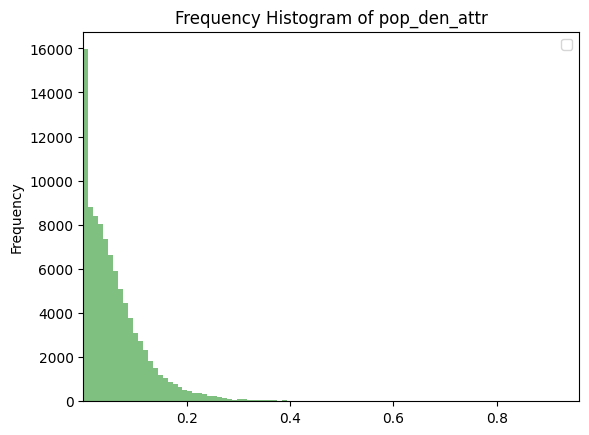

In [6]:
df_to_histogram(pop_den_df['pop_den_attr'], "pop_den_attr")


## Create dictionary of nodes from the Carall graph from nearest population density counters

In [7]:
i=0
nDict = {}
for i in range(len(pop_den_df)):
    n = ox.distance.get_nearest_node(G_carall, [pop_den_df.iloc[i].lat,pop_den_df.iloc[i].long])
    if haversine([pop_den_df.iloc[i].lat,pop_den_df.iloc[i].long], (G_carall.nodes[n]["y"], G_carall.nodes[n]["x"]), unit="m") <= snapthreshold:
        nDict = {**nDict, n: pop_den_df.iloc[i].pop_den_attr}
        i+=1
        print(i)

53644
53648
53649
53650
53651
53653
53654
53655
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54435
54436
54437
54438
54439
54440
54441
54442
54443
54444
54445
54446
54447
54448
54449
54450
54451
54452
54453
54454
54835
54836
54837
54838
54839
54840
54841
54842
54843
54844
54845
54846
54847
54848
54849
54850
54851
54852
54853
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55634
55635
55636
55637
55638
55639
55640
55641
55642
55643
55644
55645
55646
55647
55648
55649
55650
55651
55652
55653
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56419
56420
56421
56422
56423
56424
56425
56426
56427
56428
56429
56430
56431
56432
56433
56434
56435
56436
56437
56438
56439
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
56832
56833
56834
56835
56836
56837
56838
56839
5684

In [8]:
nnDict = nDict.copy()

In [9]:
nDict

{26653560: 0.00042027343219335536,
 4775492488: 0.00024314492767388187,
 26506949: 0.00021016298098127642,
 26506955: 0.0003873260413406247,
 26576775: 0.00023764189617346651,
 25951278: 0.0003929480408719686,
 368354189: 0.0003040387269328431,
 7326848649: 0.0001562116121213804,
 282908434: 0.00023982022850839546,
 1460880600: 0.00022598486033848737,
 8493001084: 0.0003334525708493092,
 394390459: 0.0001486871066425602,
 26653572: 0.0003724853713554566,
 402386609: 0.0004990368929105327,
 30479034: 0.0004595411903059247,
 31268879: 0.0007806130480538226,
 25506066: 0.00020636968912945646,
 26490994: 0.0001507607011020401,
 1394757314: 0.00018028080143266898,
 26211698: 0.0001971898900127172,
 20930007: 0.00031530848077430403,
 20929946: 0.0004896210146869569,
 1578270295: 0.00021004559466287272,
 5010924843: 0.000509978794668356,
 20923511: 0.0012727610719687193,
 20923517: 0.0010609807492606678,
 1041202738: 0.0015649214602176697,
 2292875763: 0.0031727512104295676,
 283085037: 0.000

## Add 'pop_den_attr' to carall graph

In [10]:
nx.set_edge_attributes(G_carall, 0.0, 'pop_den_attr')

In [11]:
for e in G_carall.edges():
    a,b=e
    lat = G_carall.nodes[a]["y"]
    long = G_carall.nodes[a]["x"]
    eDistDict = {}
    
    for n in nDict:
        y = G_carall.nodes[n]["y"]
        x = G_carall.nodes[n]["x"]
        dist = haversine([lat,long], (y,x), unit="m")
        eDistDict = {**eDistDict, dist:nDict[n]}
    
    minDist = min(eDistDict.keys()) 
    popDenAttr = eDistDict[minDist]
    edgelength = edgelength = G_carall.get_edge_data(a,b,0)['length']
    pop_den_attr = popDenAttr * edgelength
    
    nx.set_edge_attributes(G_carall, {(a,b,0): {"pop_den_attr": pop_den_attr }})
    
        #(distance: (node, pop_den_attr))
        


## Normalisation

In [12]:
normalise_graph_attr(G_carall, "pop_den_attr")

pop_len_attr_dict = nx.get_edge_attributes(G_carall, "pop_den_attr")

pop_den_attr_mean = statistics.mean([k for k in pop_len_attr_dict.values()])

with open('../../bikenwgrowth_external/data/copenhagen/bikedata/mean_pop_den_attr.pkl', 'wb') as f:
    pickle.dump(pop_den_attr_mean, f)

ox_to_csv(G_carall, PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall')

ox_to_csv(ox.simplify_graph(G_carall), PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall', "_simplified")

ox.save_graphml(G_carall, "../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml")

with open('../../bikenwgrowth_external/data/copenhagen/bikedata/edges_dict_pop_den_attr.pkl', 'wb') as f:
    pickle.dump(pop_len_attr_dict, f)



copenhagen: Successfully wrote graph carall
copenhagen: Successfully wrote graph carall_simplified


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


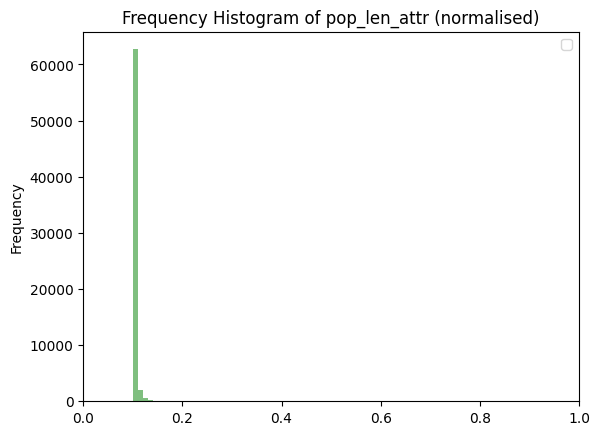

In [13]:
dict_to_histogram(pop_len_attr_dict, "pop_len_attr (normalised)")

## Plot nearest edges of population density counts 

## KØR IKKE!! Plot nearest edges, including visualisation of population density described with dots

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


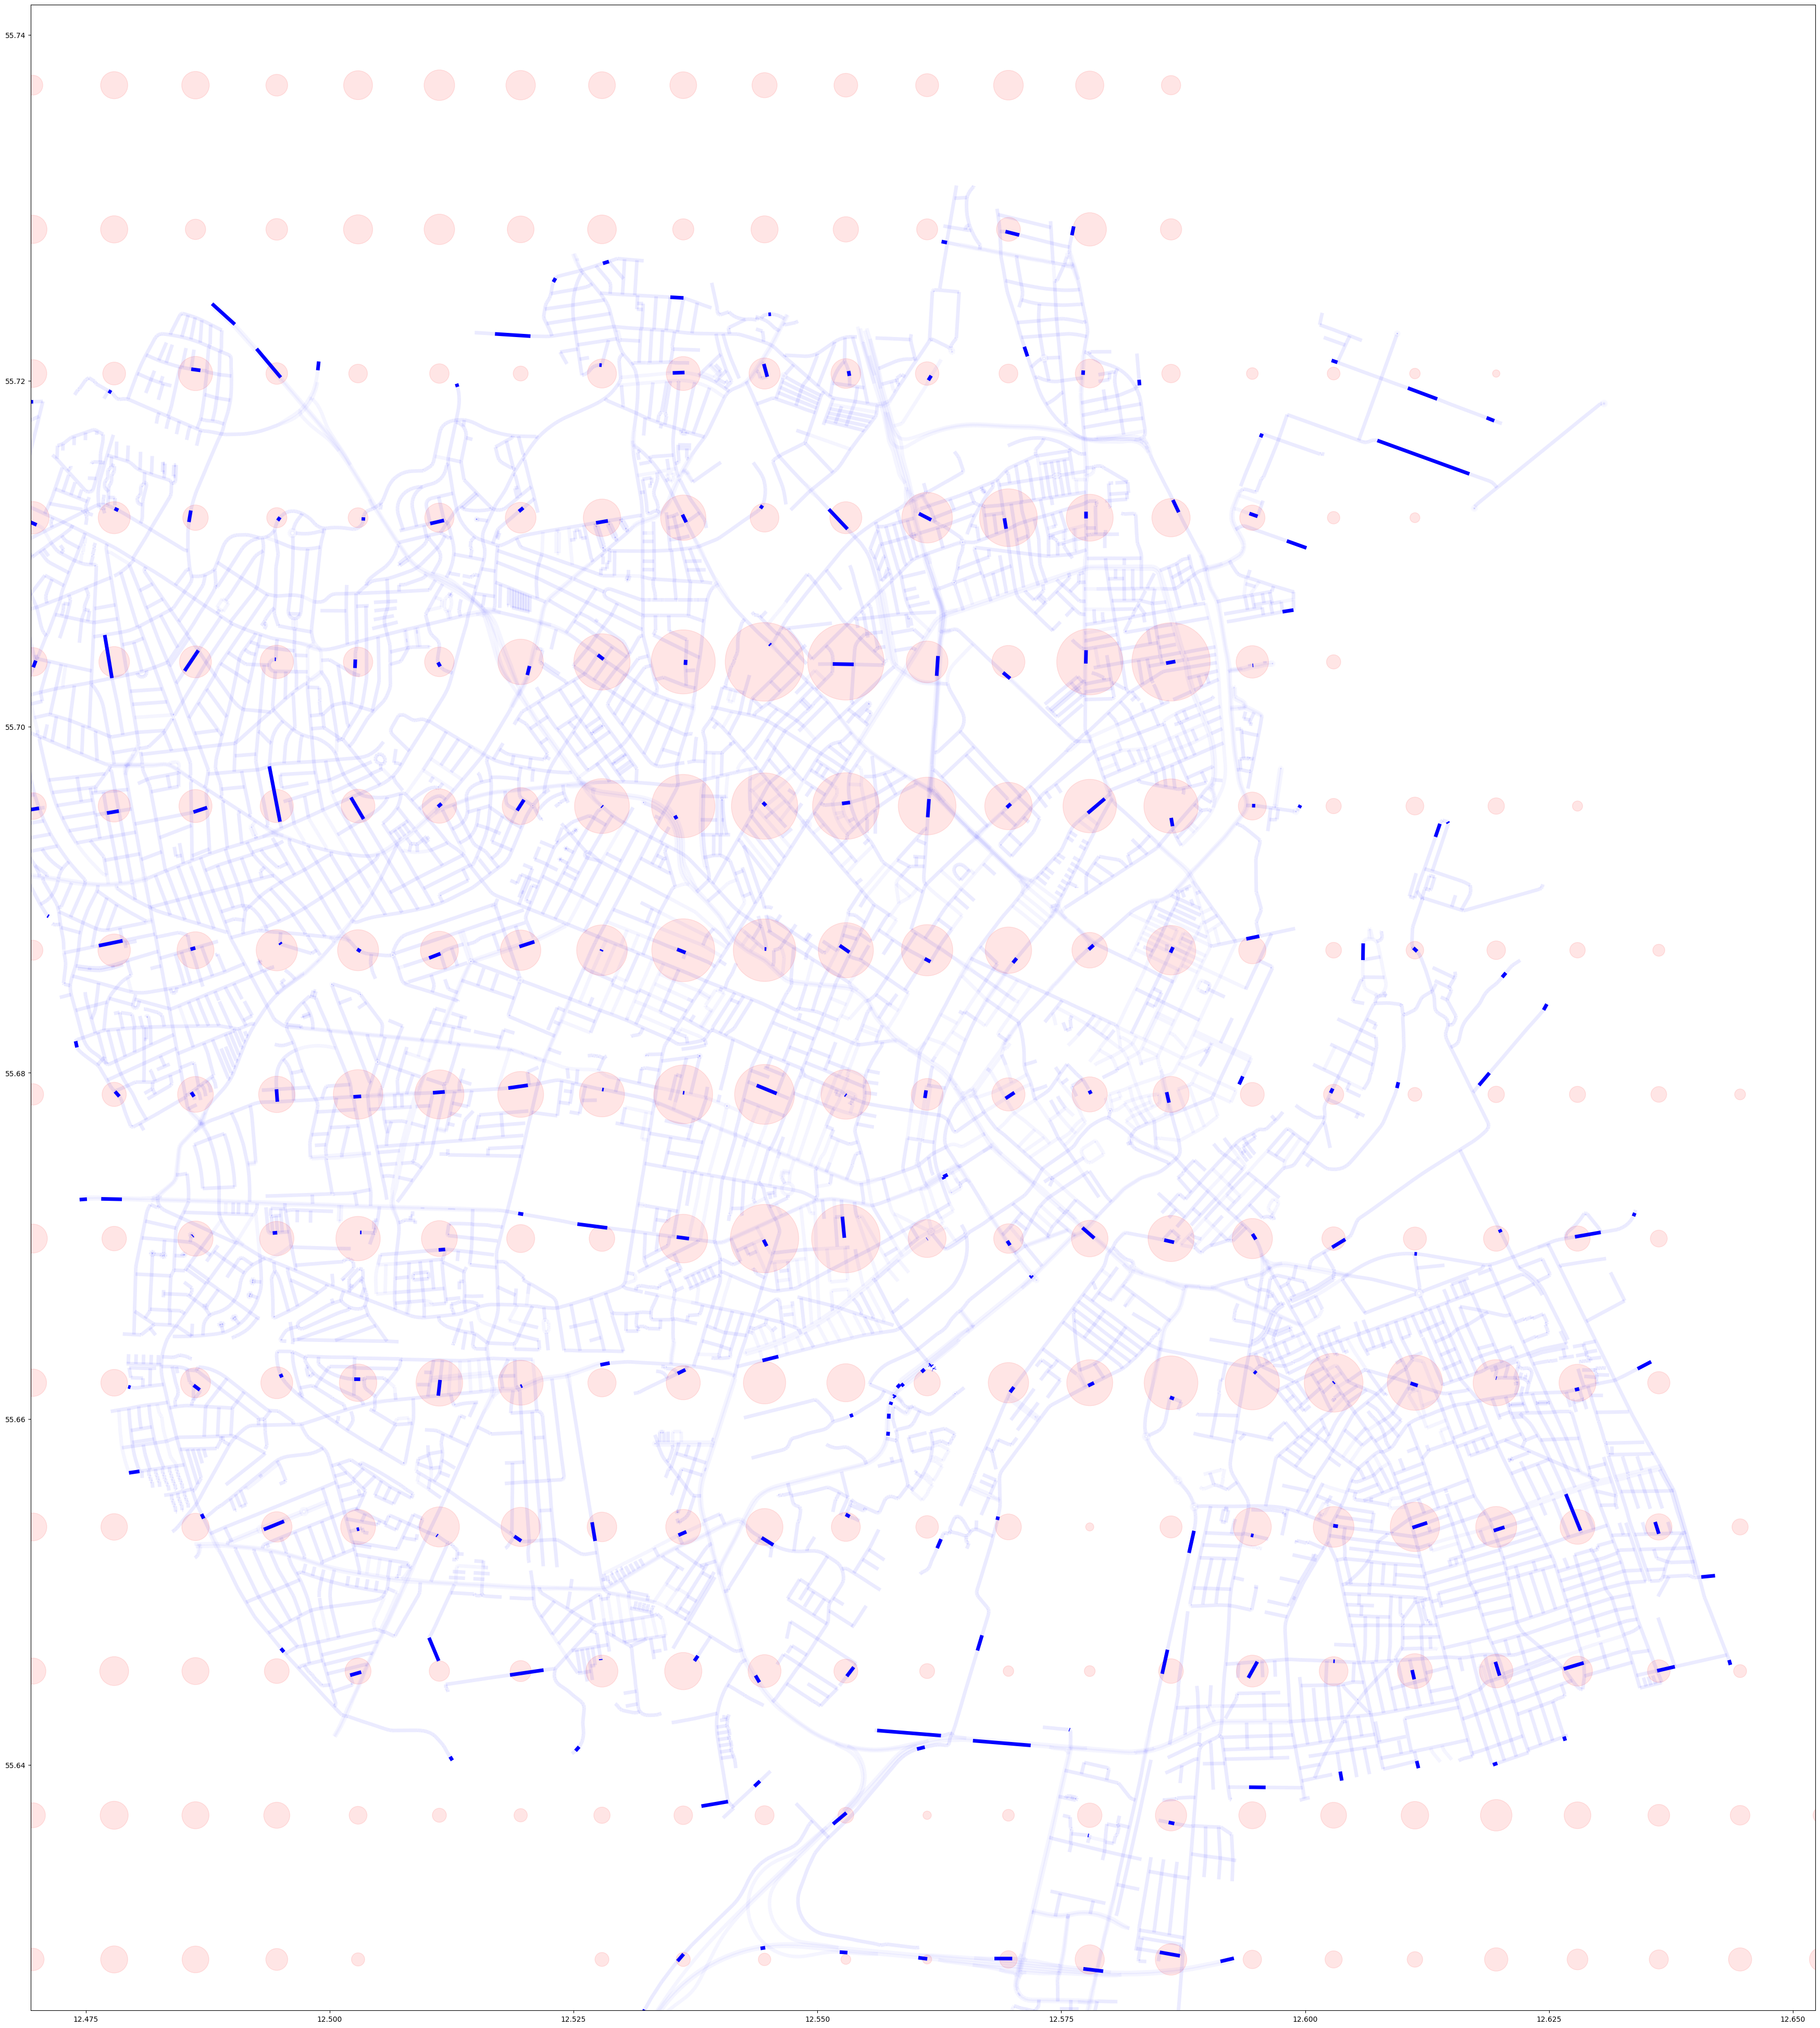

In [197]:
poplanes = gpd.GeoDataFrame(pop_den_df, geometry=gpd.points_from_xy(pop_den_df['long'], pop_den_df['lat']))
lanes = ox.graph_to_gdfs(G_carall, nodes=False) 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ac = [0.04 if (pop_len_attr_dict[k]) == pop_den_attr_unassigned else 1.0 for k in pop_len_attr_dict]
ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
lw = [k/3 for k in pop_den_df['pop_den'] ]

poplanes.plot(ax=ax, color='red', markersize = lw, alpha = 0.1)
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = 5)
#bikelanes2.plot(ax=ax, color='red', alpha = 0.3,linestyle=(0,(5,10)))
plt.axis([12.469380, 12.652281, 55.625802, 55.741728])
plt.show()

# Calculate betweenness centrality for pop_den_attr

In [128]:
btw_pop_den_attr = nx.edge_betweenness_centrality(G_carall,  weight='pop_den_attr')

In [ ]:
btw_pop_den_attr_norm = normalise_edge_dict(btw_pop_den_attr)

In [138]:
with open('../../bikenwgrowth_external/data/copenhagen/bikedata/btw_pop_den_attr.pickle', 'wb') as y:
    pickle.dump(btw_pop_den_attr_norm, y)

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


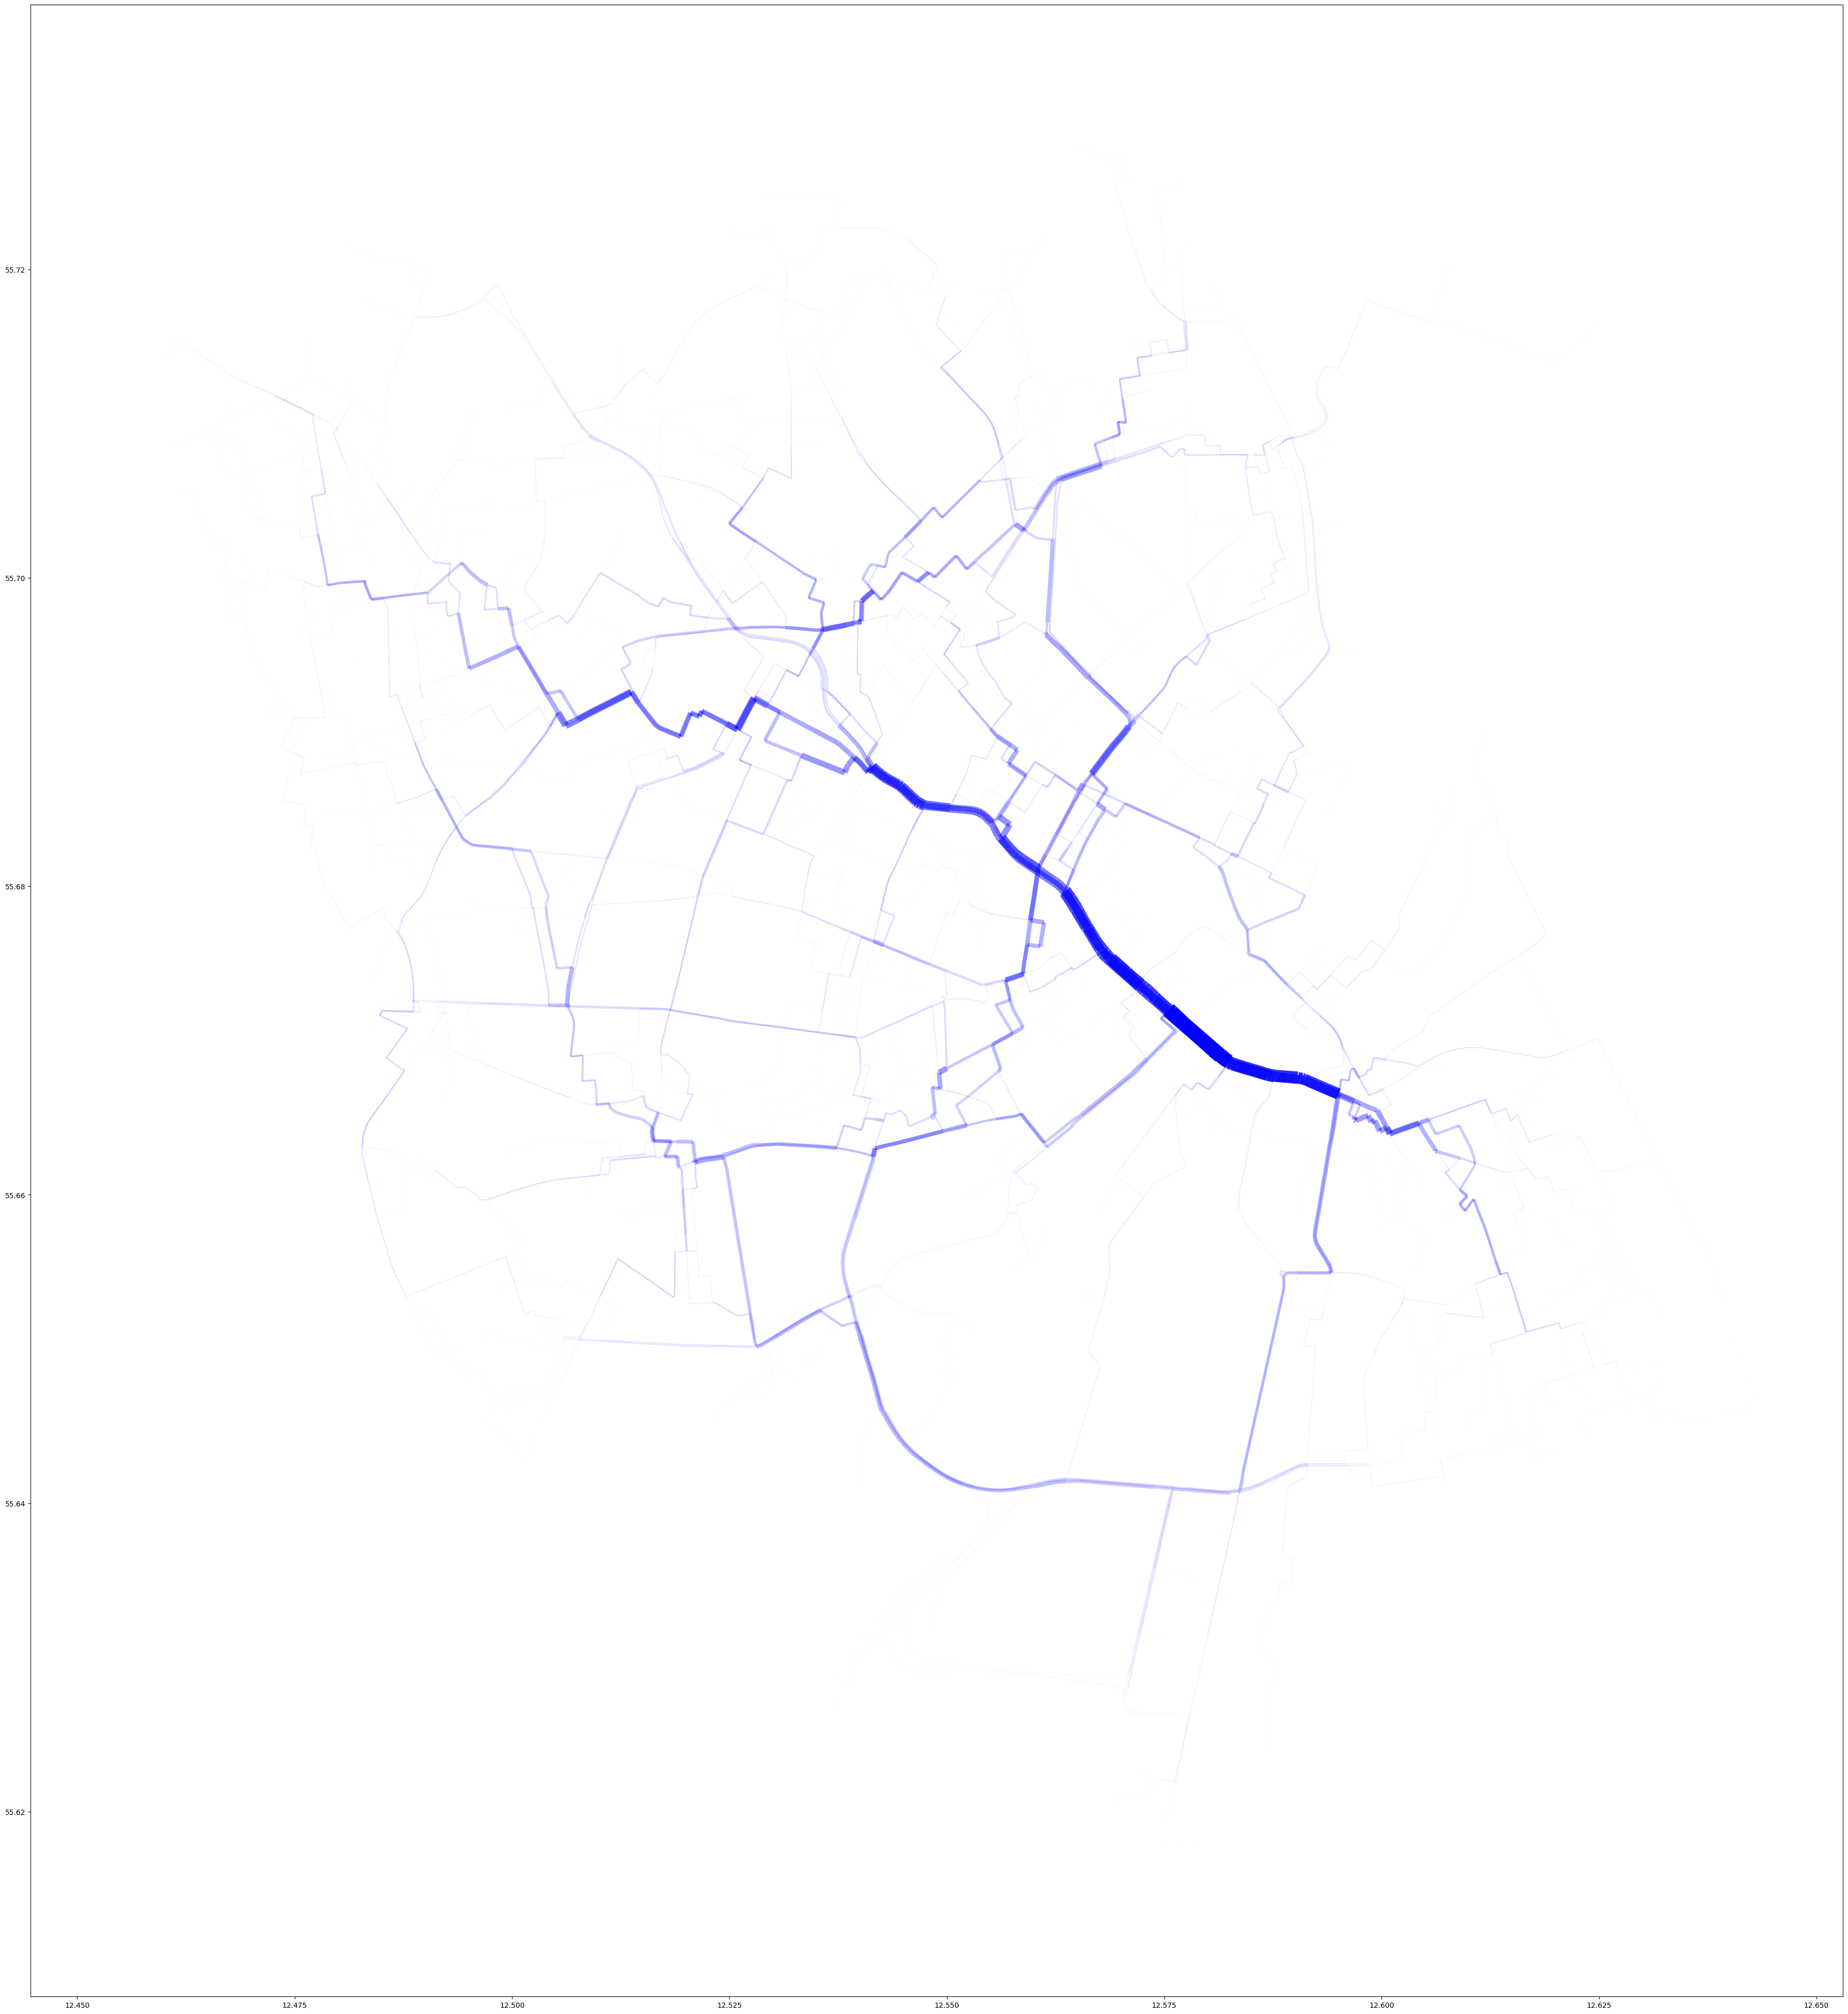

In [137]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_pop_den_attr_norm[k] for k in btw_pop_den_attr_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_pop_den_attr_norm[k]*20 for k in btw_pop_den_attr_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

In [362]:
btw_pop_den_attr = nx.edge_betweenness_centrality(G_carall,  weight='pop_den_attr')

In [363]:
btw_pop_den_attr_norm = normalise_edge_dict(btw_pop_den_attr)

In [364]:
with open('../../bikenwgrowth_external/data/copenhagen/bikedata/btw_pop_den_attr.pickle', 'wb') as y:
    pickle.dump(btw_pop_den_attr_norm, y)

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


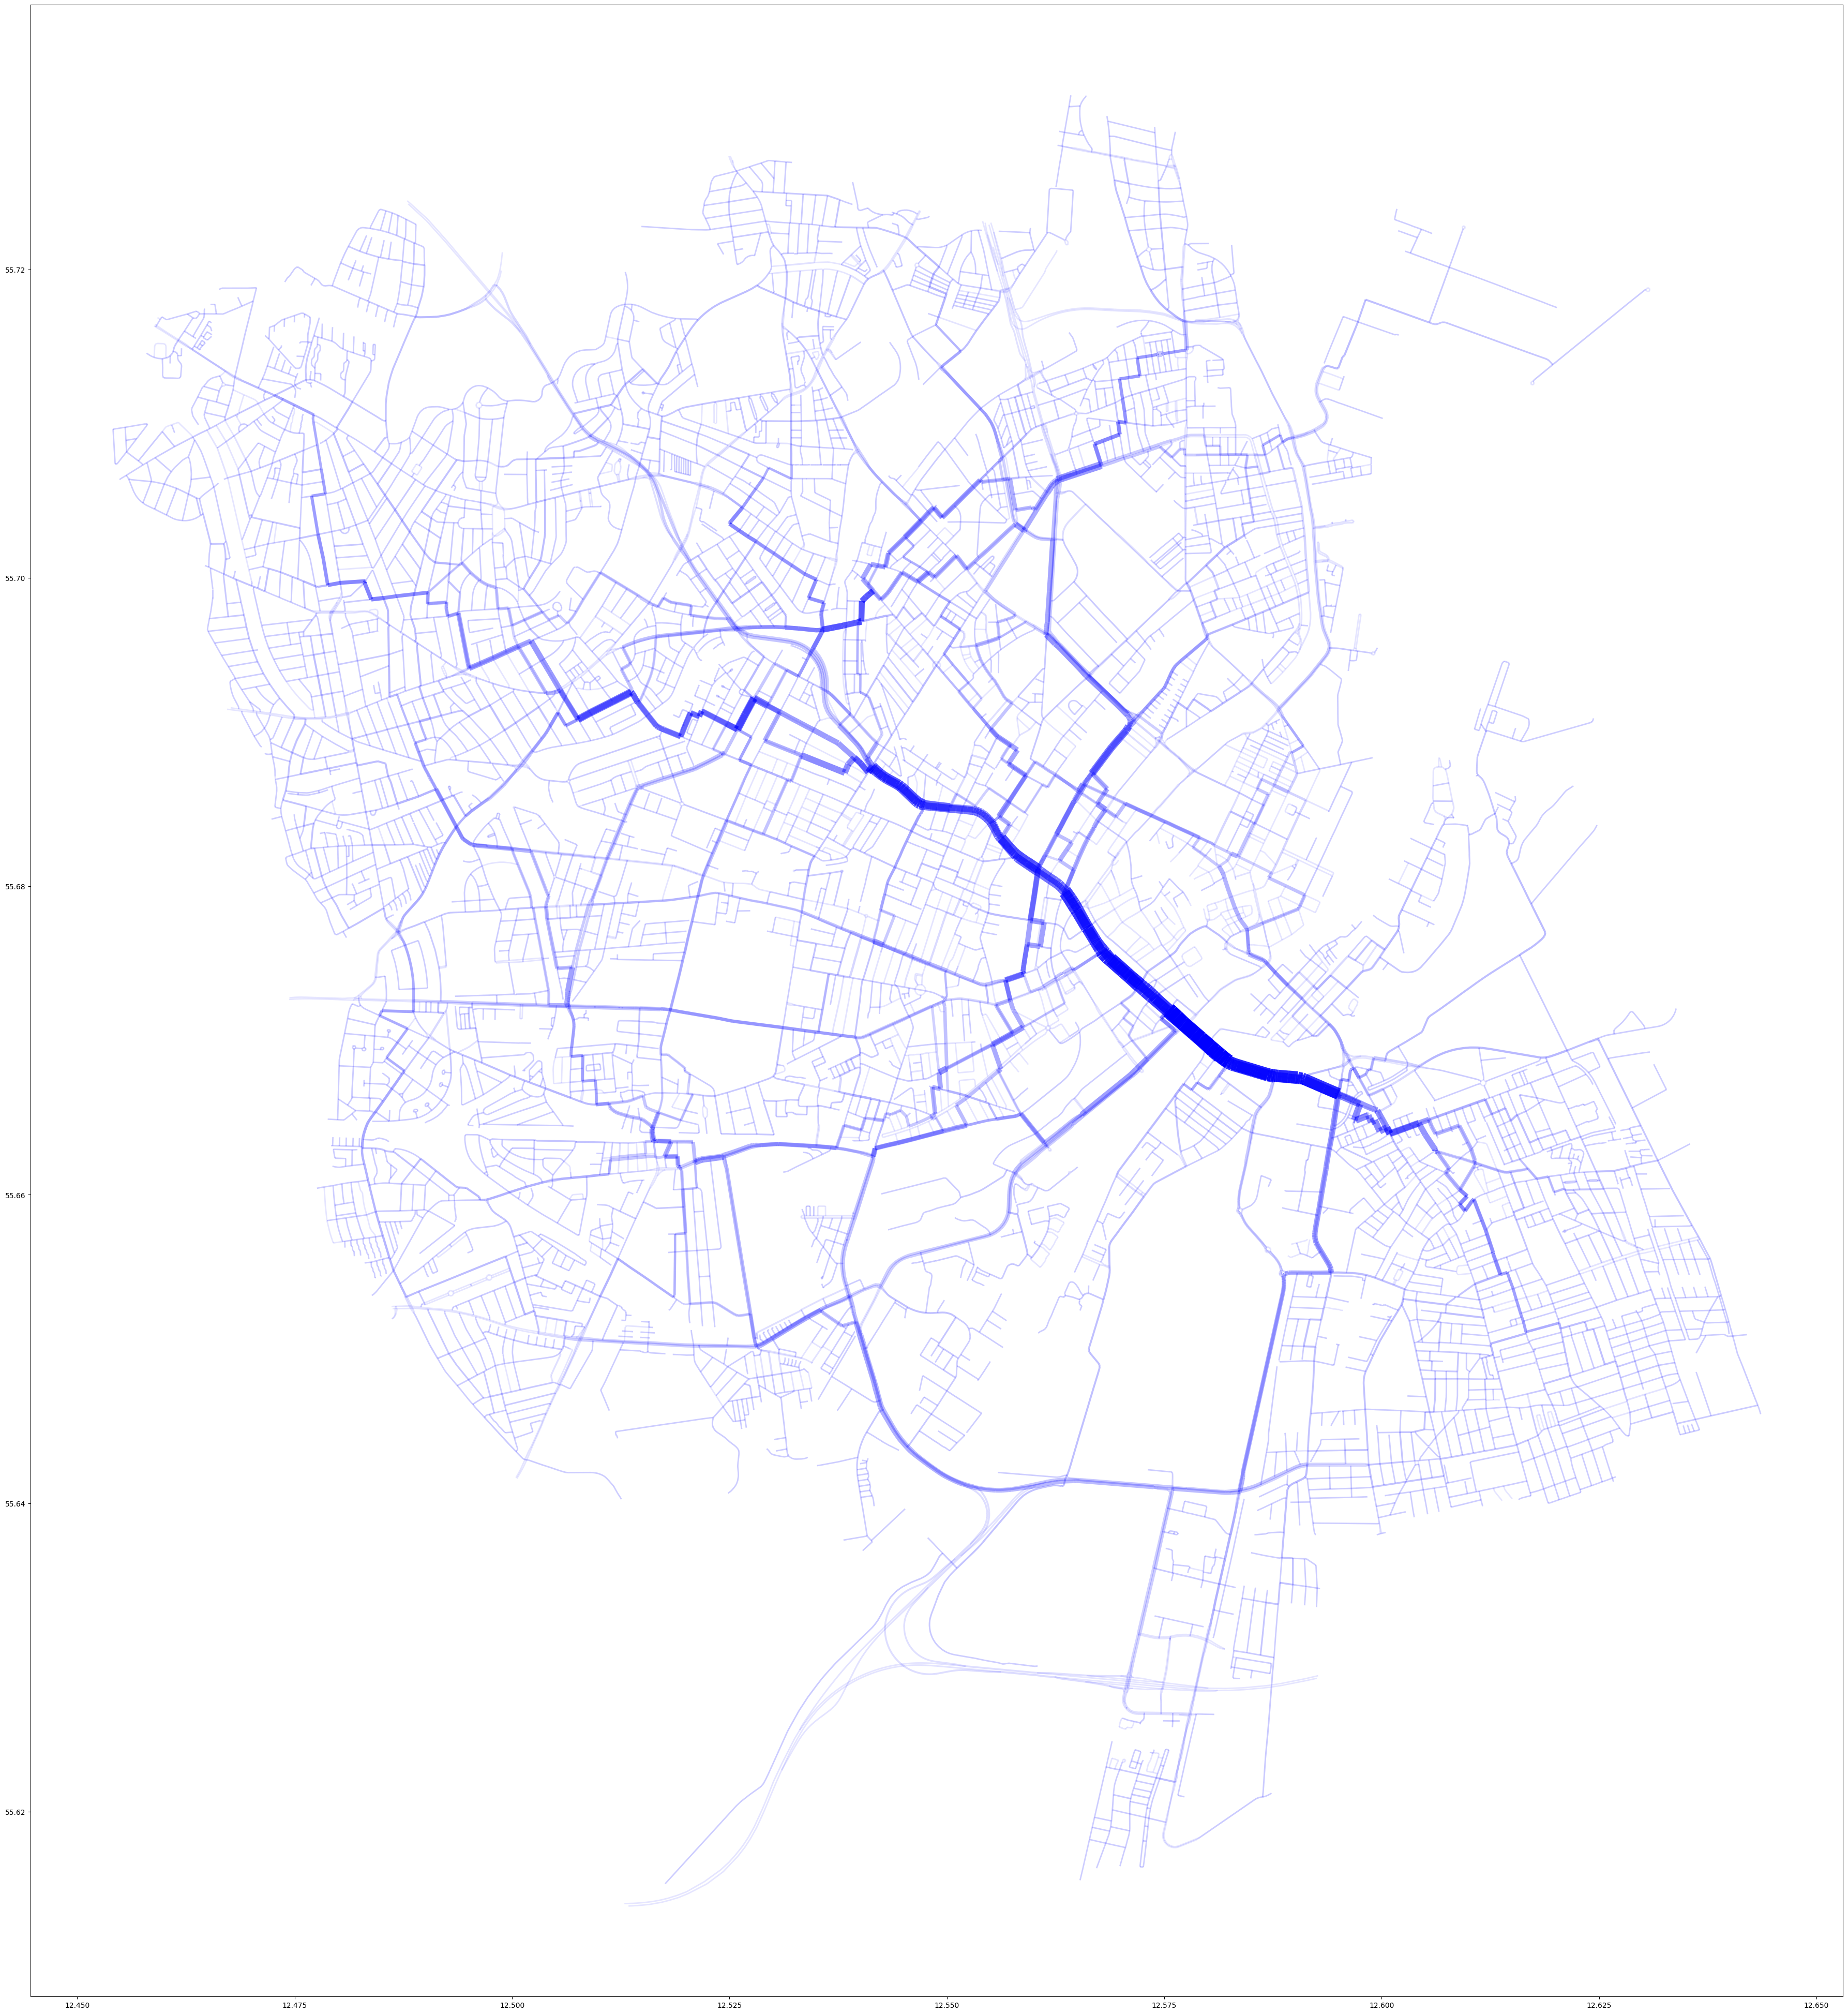

In [365]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_pop_den_attr_norm[k] for k in btw_pop_den_attr_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_pop_den_attr_norm[k]*20 for k in btw_pop_den_attr_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

In [133]:
Audio(sound_file, autoplay=True)